# Sandbox Notebook

This notebook page sets up the basic Python environment and shows a simple neural network model. Feel free to replace any or all of the second code box.

In [49]:
# Run this block first by selecting it and choosing "Run" from the menu, or pressing SHIFT + ENTER

import sys, random, math
!conda install --yes --prefix {sys.prefix} scikit-learn
!conda install --yes --prefix {sys.prefix} numpy
!conda install --yes --prefix {sys.prefix} pandas
!conda install --yes --prefix {sys.prefix} matplotlib

import math
import random
import numpy as np
from matplotlib import pyplot as plt
# .. you may have to import specifics from sklearn 

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.1                   |         openblas           1 

## Do whatever Python you wish here...

Building Training data...
Training the model...
Building Test data...
Results...
Overall Training Error = 0.0001
Overall Test Error     = 0.0001


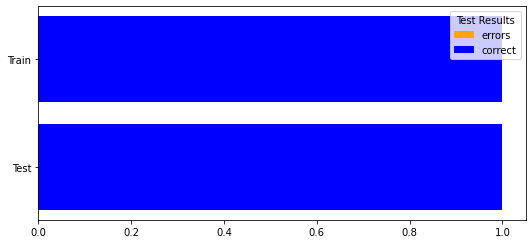

In [67]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error as ERR

X1_train = []
y1_train = []
X1_test  = []
y1_test  = []

# This is a true function I want the model to learn
def f(x1, x2):
    return x1 + x2

print("Building Training data...")
for i in range(1000):                    # <-- We need sufficient training data, so expirement with larger training data sizes here
    a = random.randint(1, 1000)
    b = random.randint(1, 20)
    c = f(a,b)
    X1_train.append([a, b]) # Training input
    y1_train.append(c)      # Training labels (expected output)

print("Training the model...")
learner = MLPRegressor(solver='adam',   # solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
            activation='relu',          # activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
            learning_rate="constant",   # learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
            alpha=1e-5,
            hidden_layer_sizes=(9,9),
            random_state=1,
            max_iter=200,
            shuffle=True,
            momentum=0.9,
            verbose=False
            )
learner.fit(X1_train,y1_train)
train_error = ERR(y1_train, learner.predict(X1_train))

print("Building Test data...")
for i in range(100):
    a = random.randint(1, 1000)
    b = random.randint(1, 20)
    c = f(a,b)
    X1_test.append([a, b])
    y1_test.append(c)
    
print("Results...")
results = learner.predict(X1_test)
test_error = ERR(y1_test, results)
print("Overall Training Error = {:>5,.4f}".format(train_error))
print("Overall Test Error     = {:>5,.4f}".format(test_error))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
errorTypes = ["Test", "Train"]
wrongs = [train_error, test_error]
rights = [(1.0 - train_error), (1.0 - test_error)]
b1 = plt.barh(errorTypes, wrongs, color="orange")
b2 = plt.barh(errorTypes, rights, left=wrongs, color="blue")
plt.legend([b1, b2], ["errors", "correct"], title="Test Results", loc="upper right")
plt.show()